In [16]:
#Imports
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

## Importing base emission values to dfBase

In [17]:
xmlDataBase = open('./emissionBaseValues.xml', 'r').read()  # Read file
rootBase = ET.XML(xmlDataBase)  # Parse XML

colsBase = []
dataBase = []
for i in rootBase:
    line = []
    for fuelInfo in i:
        # print(i.attrib["time"] + " " + fuelinfo.attrib["id"] + " " + str(fuelinfo.attrib["fuel"]))
        line.append(float(fuelInfo.attrib["fuel"]))

        if (fuelInfo.attrib["id"] not in colsBase):
            colsBase.append(fuelInfo.attrib["id"])
    dataBase.append(line)

dfBase = pd.DataFrame(dataBase)
dfBase.columns = colsBase
# print(dfBase)


#### Total consumption of each car

<AxesSubplot:>

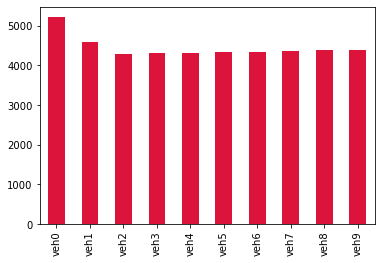

In [18]:
baseSum = dfBase.sum(0)
# print(summed)
baseSum.plot(x = "vehicle id", y = "fuel consumption (ml)", kind="bar", color="crimson")

## Importing emission scaling values to dfScale

In [19]:
xmlDataScale = open("./emissionScaleValues.xml", "r").read()
rootScale = ET.XML(xmlDataScale)

colsScale = []
dataScale = []
for i in rootScale:
    line = []
    for scaleInfo in i:
        line.append(float(scaleInfo.attrib["scaling"]))

        if (scaleInfo.attrib["id"] not in colsScale):
            colsScale.append(scaleInfo.attrib["id"])
    dataScale.append(line)
dfScale = pd.DataFrame(dataScale)
dfScale.columns = colsScale
# print(dfScale)

#### Total scaling values of each car

<AxesSubplot:>

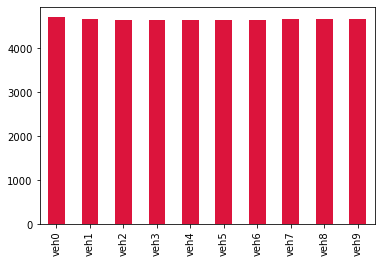

In [20]:
scaledSum = dfScale.sum(0)
# print(scaledSum)
scaledSum.plot(kind="bar", color="crimson")

## Scaling base consumptions for simulated savings

In [21]:
vehicles = dfBase.columns
rowsBase = len(dfBase.index)
rowsScale = len(dfScale.index)
rowsSmaller = rowsBase if rowsBase < rowsScale else rowsScale

dataBaseScaled = []

for i in range(rowsSmaller):
    line = []
    for veh in vehicles:
        b = dfBase[veh][i]
        s = dfScale[veh][i]
        bsd = b*s
        line.append(bsd)
    dataBaseScaled.append(line)

dfBaseScaled = pd.DataFrame(dataBaseScaled, columns=vehicles)

#### Total consumed fuel of each car (ml/s/10)

veh0    4790.8960
veh1    4207.5900
veh2    3890.6830
veh3    3902.1000
veh4    3913.4475
veh5    3926.9200
veh6    3938.2335
veh7    3949.5725
veh8    3962.9005
veh9    3974.1460
dtype: float64


<AxesSubplot:>

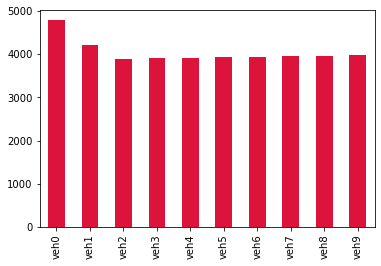

In [22]:
baseScaledSum = dfBaseScaled.sum(0)
print(baseScaledSum)
baseScaledSum.plot(kind="bar", color="crimson")